<a href="https://colab.research.google.com/github/RenanNB360/PyTorch/blob/main/Transfer_Learning_with_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Importações

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import shutil
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch import optim
from torchvision import datasets, models
import torchvision.transforms as transforms
from datetime import datetime
torch.__version__

'2.1.0+cu118'

In [2]:
torch.manual_seed(123)

# Etapa 2: Base de dados

In [3]:
!wget http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar

--2023-10-27 21:45:13--  http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar
Resolving groups.csail.mit.edu (groups.csail.mit.edu)... 128.30.2.44
Connecting to groups.csail.mit.edu (groups.csail.mit.edu)|128.30.2.44|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2592010240 (2.4G) [application/x-tar]
Saving to: ‘indoorCVPR_09.tar’

indoorCVPR_09.tar   100%[===================>]   2.41G  56.1MB/s    in 45s     

2023-10-27 21:45:59 (54.5 MB/s) - ‘indoorCVPR_09.tar’ saved [2592010240/2592010240]



In [4]:
!tar -xvf indoorCVPR_09.tar

A saída de streaming foi truncada nas últimas 5000 linhas.
Images/mall/cover_home3.jpg
Images/mall/CP67791.jpg
Images/mall/crocker_galleria_735089.jpg
Images/mall/mall1.jpg
Images/mall/d8.jpg
Images/mall/deira_city_centre_dubai_08.jpg
Images/mall/dungarv_new_mall.jpg
Images/mall/latham_circle_mall_16.jpg
Images/mall/eastridg1.jpg
Images/mall/IMG_6449.jpg
Images/mall/main_boutique_b.jpg
Images/mall/easyfranchise_centre_commercial_1.jpg
Images/mall/ins42.jpg
Images/mall/mall14.jpg
Images/mall/eaton_centre_2001_03.jpg
Images/mall/ins43.jpg
Images/mall/mall17.jpg
Images/mall/full_shopping_Central_1.jpg
Images/mall/galleria.jpg
Images/mall/galleria1.jpg
Images/mall/galleria2.jpg
Images/mall/Galleria_003.jpg
Images/mall/laurel_mall_06.jpg
Images/mall/Galleria_1.jpg
Images/mall/galleria_san_federico_nr_109_2_n1.jpg
Images/mall/ins23.jpg
Images/mall/ins44.jpg
Images/mall/mall18.jpg
Images/mall/galleria_vittorio_emanuele_ii_milan_mlgalar.jpg
Images/mall/ins45.jpg
Images/mall/mall19.jpg
Images/m

# Etapa 3: Preparando as pastas dos datasets

In [5]:
num_files_per_folder = [len(files) for root, dirs, files in os.walk('Images') if len(files) > 0]
folders = [dirs for root, dirs, files in os.walk('Images') if len(dirs) > 0][0]

num_files_per_folder[:5], folders[:5]

([113, 151, 347, 102, 108],
 ['classroom', 'waitingroom', 'toystore', 'inside_bus', 'studiomusic'])

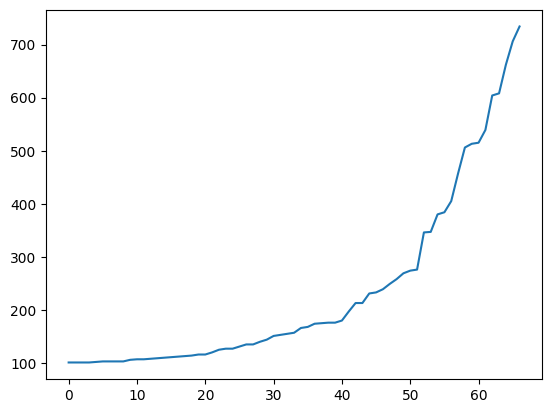

In [6]:
plt.plot(sorted(num_files_per_folder))

In [7]:
sum(np.array(num_files_per_folder) > 600)

5

In [8]:
mask = np.array(num_files_per_folder) > 600
folders_to_keep = list(np.array(folders)[mask])
folders_to_keep

['bedroom', 'livingroom', 'bar', 'airport_inside', 'kitchen']

In [9]:
[shutil.rmtree('Images/' + folder) for folder in folders if folder not in folders_to_keep]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [10]:
num_files_per_folder = [len(files) for root, dirs, files in os.walk('Images') if len(files) > 0]
folders = [dirs for root, dirs, files in os.walk('Images') if len(dirs) > 0][0]
filesnames = [os.listdir('Images/' + folder) for folder in folders]
num_files_per_folder, folders, filesnames

([662, 706, 604, 608, 734],
 ['bedroom', 'livingroom', 'bar', 'airport_inside', 'kitchen'],
 [['indoor_0293.jpg',
   'N190000.jpg',
   'int198.jpg',
   'indoor_0430.jpg',
   'room474.jpg',
   'bedroom5.jpg',
   'SoftcrL_T.jpg',
   'pen_woodnleather_sleighl.jpg',
   'room489.jpg',
   'IMG_1081.jpg',
   'int213.jpg',
   'int642.jpg',
   'int798.jpg',
   'IMG_2123.jpg',
   'indoor_0238.jpg',
   'int191.jpg',
   'b9.jpg',
   'int484.jpg',
   'int192.jpg',
   'room481.jpg',
   'img_1039.jpg',
   'indoor_0123.jpg',
   'homeoff005.jpg',
   'kamer3g.jpg',
   'image_0009.jpg',
   'N02m.jpg',
   'int206.jpg',
   'int263.jpg',
   'N190093.jpg',
   'int300.jpg',
   'int266.jpg',
   'indoor_0557.jpg',
   'int132.jpg',
   'b21.jpg',
   'int496.jpg',
   'bedroom13.jpg',
   'IMG_1566.jpg',
   'aa016560.jpg',
   'int713.jpg',
   'IMG_1683.jpg',
   'at_01_5a_1420_19_l.jpg',
   'b29.jpg',
   'int161.jpg',
   'room415.jpg',
   'IMG_9815.jpg',
   'IMG_2342.jpg',
   'int261.jpg',
   'room229.jpg',
   'room2

In [11]:
np.random.seed(23)
files_to_test = [sorted(np.random.choice(files, round(num_files * 0.2), replace = False)) for files, num_files in zip(filesnames, num_files_per_folder)]
files_to_test

[['13_2o_andar_panorama.jpg',
  'D41.jpg',
  'D61.jpg',
  'Feb_08_Comstock_room_comprssd.jpg',
  'IMG_1098.jpg',
  'IMG_1245.jpg',
  'IMG_1551.jpg',
  'IMG_1556.jpg',
  'IMG_2123.jpg',
  'IMG_2126.jpg',
  'IMG_2338.jpg',
  'IMG_2342.jpg',
  'IMG_2830.jpg',
  'IMG_3699.jpg',
  'IMG_3737.jpg',
  'IMG_4828.jpg',
  'IMG_8705.jpg',
  'IMG_9642.jpg',
  'IMG_9810.jpg',
  'IMG_9816.jpg',
  'IN107.jpg',
  'Mountain_Room_706.jpg',
  'PH_02_04_4682_12_l.jpg',
  'ROOM0_20080320_102152_673.jpg',
  'S41.jpg',
  'b12.jpg',
  'b13.jpg',
  'b20.jpg',
  'b27.jpg',
  'b30.jpg',
  'b7.jpg',
  'bed136.jpg',
  'bed170.jpg',
  'bed8.jpg',
  'bedroom14.jpg',
  'bedroom15.jpg',
  'bedroom6.jpg',
  'cdMC1107.jpg',
  'chambre.jpg',
  'chambre1.jpg',
  'd03.jpg',
  'dsc01901.jpg',
  'dsc05905.jpg',
  'homeoff005.jpg',
  'image_0009.jpg',
  'imagem_003.jpg',
  'indoor_0069.jpg',
  'indoor_0105.jpg',
  'indoor_0123.jpg',
  'indoor_0145.jpg',
  'indoor_0186.jpg',
  'indoor_0200.jpg',
  'indoor_0202.jpg',
  'indoor_0

In [12]:
os.mkdir('Images/test/')
[os.mkdir('Images/test/' + folder) for folder in folders];
[shutil.move('Images/' + folder + '/' + file, 'Images/test/' + folder + '/' + file) for files, folder in zip(files_to_test, folders) for file in files];

In [13]:
os.mkdir('Images/train/')
[shutil.move('Images/' + folder, 'Images/train/' + folder) for folder in folders];

In [14]:
os.rename('Images', 'dataset')

# Etapa 4: Inspeção das images

In [15]:
filenames = [os.listdir('dataset/train/' + folder) for folder in folders]
files_to_visualize = [sorted(np.random.choice(files, 4, replace = False)) for files in filenames]
files_to_visualize

[['indoor_0068.jpg', 'indoor_0182.jpg', 'int190.jpg', 'smallsp026.jpg'],
 ['familyroom72.jpg', 'indoor_0597.jpg', 'int831.jpg', 'living23.jpg'],
 ['bar_0123.jpg', 'bar_0137.jpg', 'bar_0368.jpg', 'bar_0525.jpg'],
 ['airport_inside_0054.jpg',
  'airport_inside_0117.jpg',
  'airport_inside_0219.jpg',
  'airport_inside_0474.jpg'],
 ['N364045.jpg', 'N364078.jpg', 'VA-02-04-7657-02_l.jpg', 'int835.jpg']]

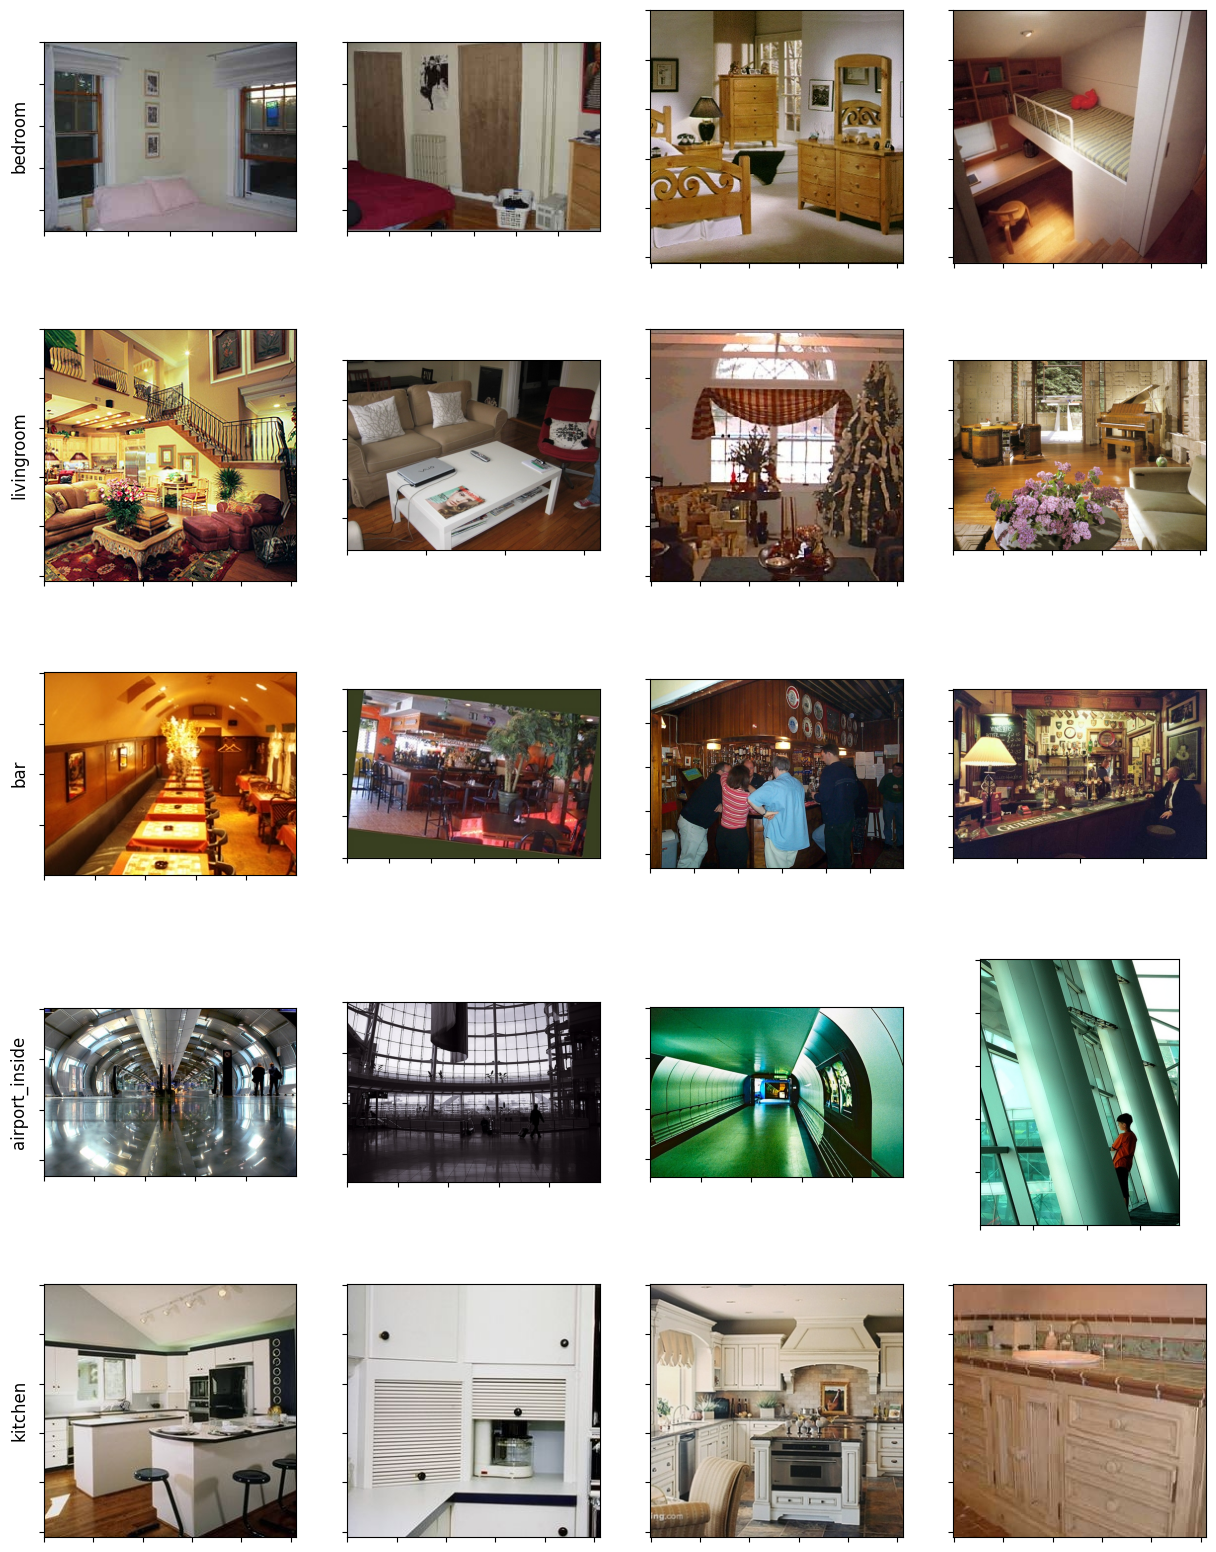

In [16]:
fig, ax = plt.subplots(5, 4, figsize = (15, 20))
for row in range(5):
  category = folders[row]
  ax_row = ax[row]
  for column in range(4):
    img = plt.imread('dataset/train/'  + category + '/' + files_to_visualize[row][column])
    ax_column = ax_row[column]
    ax_column.imshow(img)
    if column == 0:
      ax_column.set_ylabel(category, size = 'large')
    ax_column.set_xticklabels([])
    ax_column.set_yticklabels([])

# Etapa 5: Preparando os datasets para uso no PyTorch

In [17]:
data_dir_train = 'dataset/train'
data_dir_test = 'dataset/test'

transform = transforms.Compose([transforms.Resize([224, 224]), transforms.ToTensor()])

train_dataset = datasets.ImageFolder(data_dir_train, transform = transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32, shuffle = True)

test_dataset = datasets.ImageFolder(data_dir_test, transform = transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 32, shuffle = True)

# Etapa 6: Definindo o modelo e parâmetros de treinamento

In [18]:
model = models.vgg16(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 127MB/s]


In [19]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [20]:
n_inputs = model.classifier[6].in_features
classification_layer = nn.Linear(n_inputs, len(train_dataset.classes))
model.classifier[6] = classification_layer

n_inputs, len(train_dataset.classes)

(4096, 5)

In [21]:
for param in model.features.parameters():
  param.requires_grad = False

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Etapa 7: Treinamento e validação

In [23]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [24]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [30]:
def training_loop(loader, epoch):

    # Variáveis para acumular perda e precisão

    running_loss = 0.
    running_accuracy = 0.

    for i, data in enumerate(loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()

        # Como `output` não passou por ativação, vamos fazer isso agora usando a função `F.softmax`. Em seguida, usamos `torch.argmax` para retornar o índice mais alto, que corresponde à predição.

        predicted = torch.argmax(F.softmax(outputs, dim = 1), dim = 1)

        # Agora podemos ver quantas predições o modelo acertou

        equals = predicted == labels

        # A precisão será igual à média da variável anterior (número de `True` dividido pelo total)

        accuracy = torch.mean(equals.float())
        running_accuracy += accuracy

        # Imprimindo os dados referentes a este loop

        print('Época {} | loop {}/{}: perda {:.5f} - precisão {:.5f}'.format(epoch + 1, i + 1, len(loader), loss.item(), accuracy))

    # Imprimindo os dados referentes a esta época

    print('>>>>> ÉPOCA {} FINALIZADA: perda {:.5f} - precisão {:.5f}'.format(epoch + 1, running_loss/len(loader), running_accuracy/len(loader)))

In [31]:
start = datetime.now()
for epoch in range(5):
  print('Treinaando...')
  training_loop(train_loader, epoch)
  model.eval()
  print('Validando...')
  training_loop(test_loader, epoch)
  model.train()
end = datetime.now()

print(f'Treinamento/validação demorou {end - start}')

Treinaando...
Época 1 | loop 1/83: perda 1.71888 - precisão 0.21875
Época 1 | loop 2/83: perda 2.98857 - precisão 0.25000
Época 1 | loop 3/83: perda 1.75189 - precisão 0.40625
Época 1 | loop 4/83: perda 2.21061 - precisão 0.37500
Época 1 | loop 5/83: perda 1.26504 - precisão 0.53125
Época 1 | loop 6/83: perda 1.07354 - precisão 0.56250
Época 1 | loop 7/83: perda 0.91361 - precisão 0.59375
Época 1 | loop 8/83: perda 0.82918 - precisão 0.68750
Época 1 | loop 9/83: perda 1.79140 - precisão 0.40625
Época 1 | loop 10/83: perda 1.97980 - precisão 0.37500
Época 1 | loop 11/83: perda 1.57544 - precisão 0.53125
Época 1 | loop 12/83: perda 1.33193 - precisão 0.62500
Época 1 | loop 13/83: perda 1.65342 - precisão 0.56250
Época 1 | loop 14/83: perda 1.98347 - precisão 0.53125
Época 1 | loop 15/83: perda 1.69233 - precisão 0.50000
Época 1 | loop 16/83: perda 1.12641 - precisão 0.59375
Época 1 | loop 17/83: perda 1.22111 - precisão 0.53125
Época 1 | loop 18/83: perda 1.25081 - precisão 0.62500
Época

# Etapa 7: Verificação

In [45]:
image, label = next(iter(test_loader))
model.eval()
predicted = model(image.to(device)).cpu()
predicted = torch.argmax(F.softmax(predicted, dim = 1), dim = 1)

In [46]:
predicted

tensor([4, 1, 0, 2, 1, 4, 4, 4, 3, 4, 3, 3, 4, 0, 0, 1, 2, 1, 0, 2, 4, 3, 0, 0,
        3, 1, 3, 2, 2, 3, 3, 0])

In [47]:
test_dataset.class_to_idx

{'airport_inside': 0, 'bar': 1, 'bedroom': 2, 'kitchen': 3, 'livingroom': 4}

In [48]:
idx_to_class = {k: v for v, k in test_dataset.class_to_idx.items()}

In [49]:
idx_to_class

{0: 'airport_inside', 1: 'bar', 2: 'bedroom', 3: 'kitchen', 4: 'livingroom'}

In [50]:
labels, predicted = label.detach().numpy(), predicted.detach().numpy()

In [51]:
labels = [idx_to_class[label] for label in labels]
predicted = [idx_to_class[label] for label in predicted]

In [52]:
labels, predicted

(['livingroom',
  'bar',
  'airport_inside',
  'bedroom',
  'bar',
  'livingroom',
  'livingroom',
  'livingroom',
  'kitchen',
  'livingroom',
  'kitchen',
  'kitchen',
  'livingroom',
  'airport_inside',
  'airport_inside',
  'bar',
  'bedroom',
  'bar',
  'airport_inside',
  'bedroom',
  'livingroom',
  'kitchen',
  'airport_inside',
  'airport_inside',
  'kitchen',
  'bar',
  'kitchen',
  'bedroom',
  'bedroom',
  'kitchen',
  'kitchen',
  'airport_inside'],
 ['livingroom',
  'bar',
  'airport_inside',
  'bedroom',
  'bar',
  'livingroom',
  'livingroom',
  'livingroom',
  'kitchen',
  'livingroom',
  'kitchen',
  'kitchen',
  'livingroom',
  'airport_inside',
  'airport_inside',
  'bar',
  'bedroom',
  'bar',
  'airport_inside',
  'bedroom',
  'livingroom',
  'kitchen',
  'airport_inside',
  'airport_inside',
  'kitchen',
  'bar',
  'kitchen',
  'bedroom',
  'bedroom',
  'kitchen',
  'kitchen',
  'airport_inside'])

In [55]:
image.shape

torch.Size([32, 3, 224, 224])

In [56]:
images = image.permute(0, 2, 3, 1).numpy()

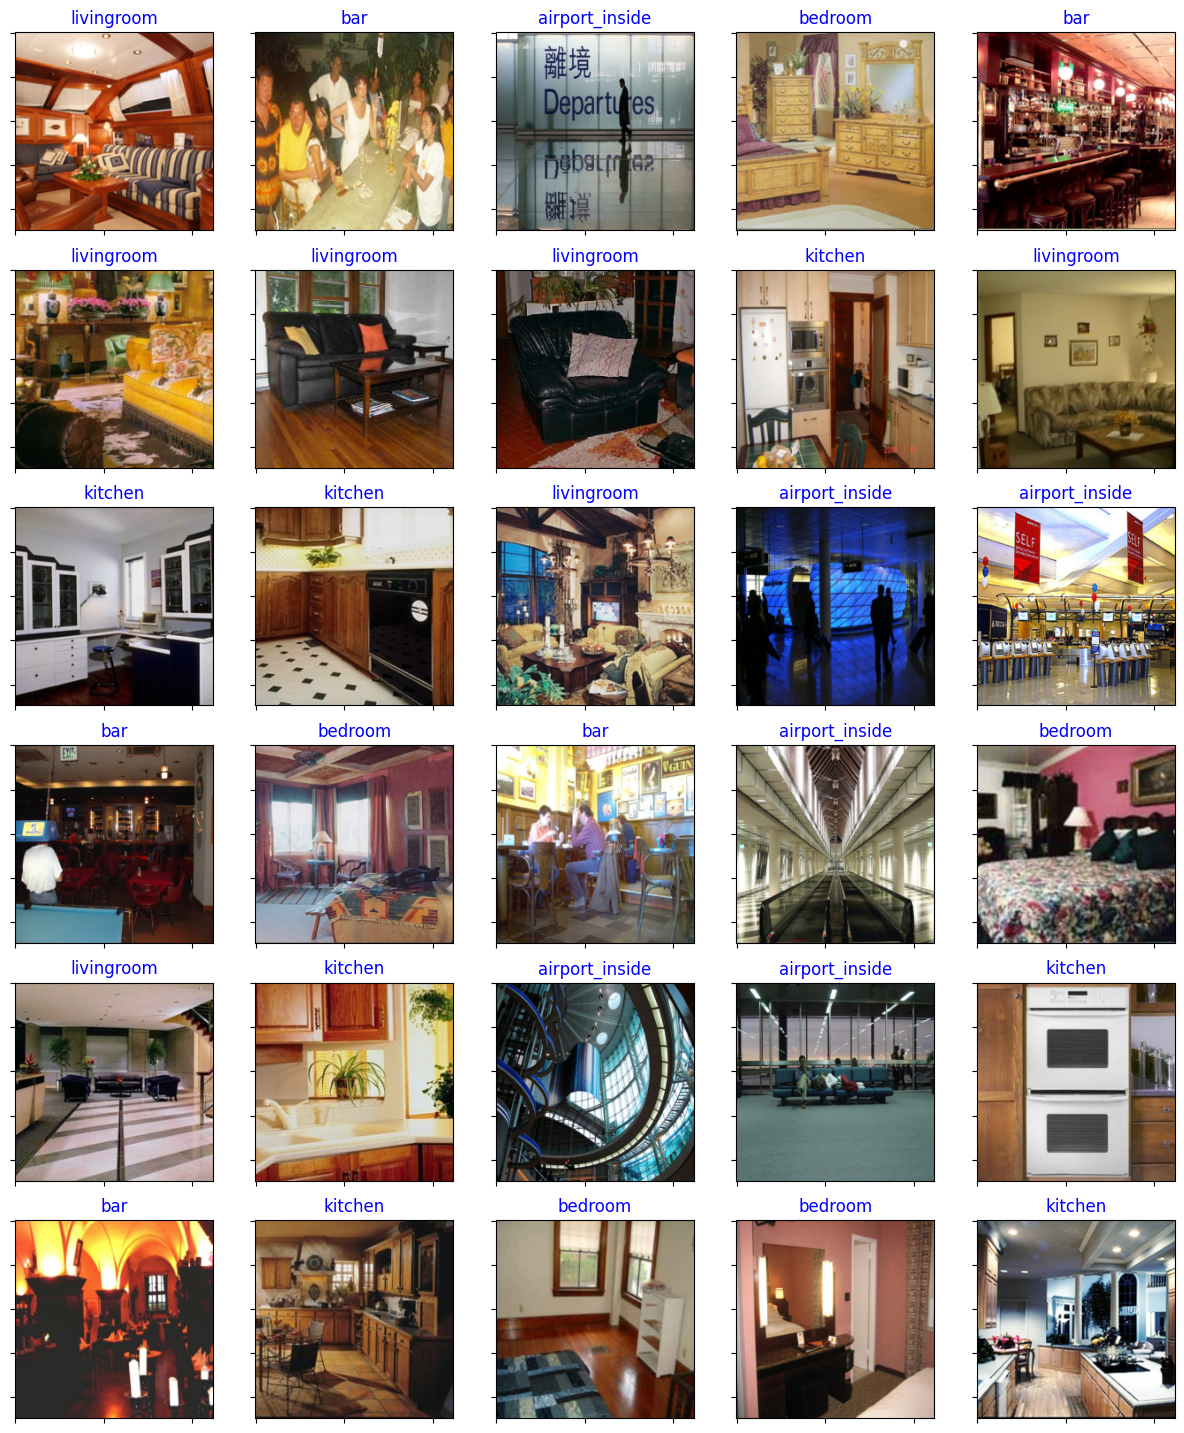

In [58]:
fig, ax = plt.subplots(6, 5, figsize = (15, 18))
i = 0
for row in range(6):
  ax_row = ax[row]
  for column in range(5):
    ax_column = ax_row[column]
    ax_column.imshow(images[i])
    ax_column.set_xticklabels([])
    ax_column.set_yticklabels([])
    col = 'blue' if labels[i] == predicted[i] else 'red'
    ax_column.set_title(predicted[i], color = col)
    i += 1